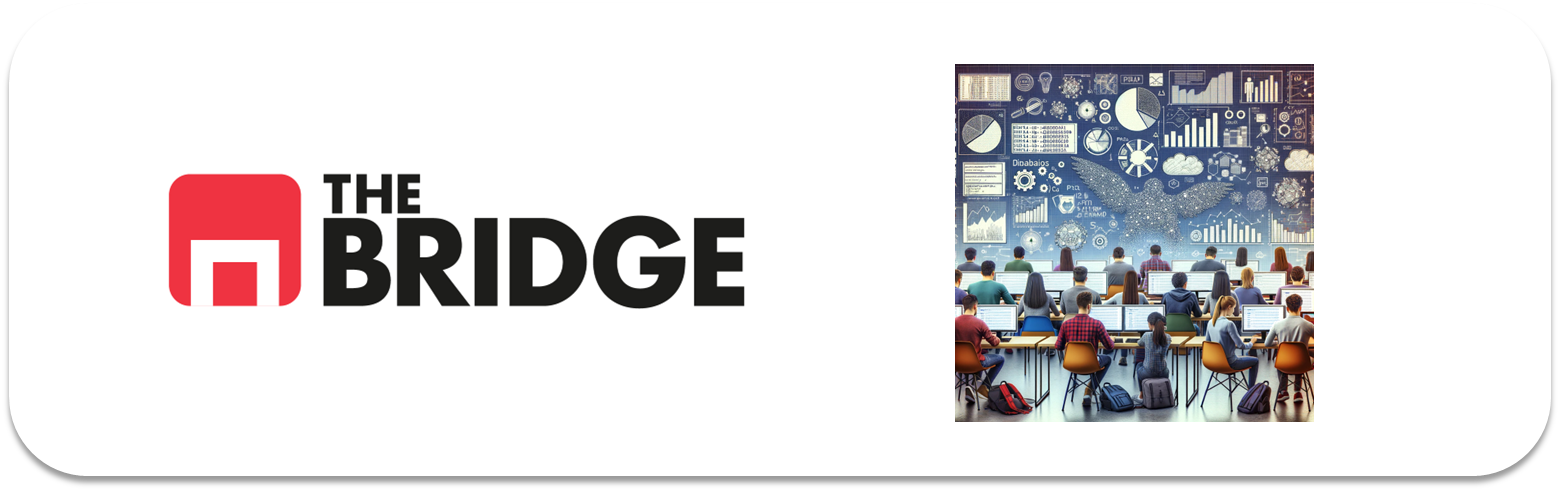

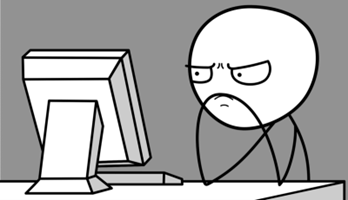

Para ejercitarte y afianzar lo aprendido sobre **Regularización**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

En estos ejercicios vamos a repasar la regularización sobre regresión lineal obteniendo primero un modelo de regresión lineal para predecir el precio de un coche y luego los equivalentes con penalizaciones L2 (Ridge), L1 (Lasso) y con la combinación de ambas (ElasticNet)

### Ejercicio 1

Carga el dataset de partida ("./data/CarPrice_Assignment.csv") en el que tenemos diferentes modelos de coches con sus características y el precio de estos. Échale un vistazo

In [3]:
df = pd.read_csv("./data/CarPrice_Assignment.csv", dtype={"price":float})
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Ejercicio 2

Identifica la variable target y asignala a una variable de nombre `target`, luego elimina de forma permanente el campo "car_ID"

In [28]:
target = "price"


In [ ]:
df.drop(columns="car_ID", inplace=True)

### Ejercicio 3

Haz un split del dataset en train y test al 80/20 empleando la función de sklearn que ya conoces

In [ ]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [11]:
train_set.shape, test_set.shape

((164, 25), (41, 25))

### Ejercicio 4

Aunque vamos a emplear todas las variabes numéricas del dataset como predictores o features, obten la correlación de todas ellas con el target y escoge los que creas que son tus tres mejores predictores. Crea una lista con los nombres de las variables numéricas y llámalo `features_num`

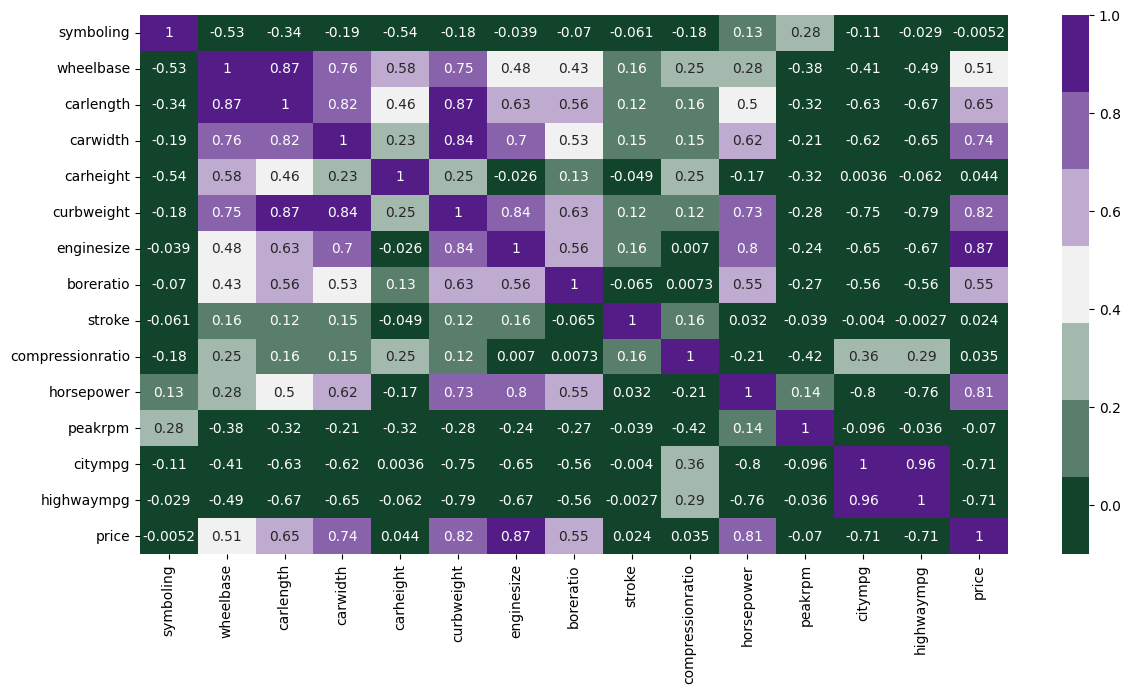

In [18]:

plt.figure(figsize=(14,7))

sns.heatmap(train_set.corr(numeric_only=True),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

curbweight, enginesize, horsepower

In [27]:
features_num = train_set.corr(numeric_only=True).columns[:-1].tolist()
features_num

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

### Ejercicio 5

Completa el siguiente código que tiene como objetivo generar un modelo de regresión lineal utilizando todos los valores de las variables (salvo la target):

In [29]:
# Separación x e y
X_train = train_set.drop(columns= [target])
y_train = train_set[target]

X_test = test_set.drop(columns = [target])
y_test = test_set[target]

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train[features_num]), columns= features_num)
X_test = pd.DataFrame(scaler.transform(X_test[features_num]), columns= features_num)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)




LinearRegression()

### Ejercicio 6

Obten el MAE,RMSE y $R^2$ para las predicciones sobre train (X_train) y para las predicciones sobre test (X_test). ¿Podemos esperar una buena generalización?

In [41]:
pred_train = lin_reg.predict(X_train)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lin_reg.score(X_train,y_train))

MAE train 2186.4952386197683
RMSE train 2911.5934585820737
R2 train 0.8578523829898764


In [42]:
pred_test = lin_reg.predict(X_test)
print('MAE test', metrics.mean_absolute_error(y_test, pred_test))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print('R2 test', lin_reg.score(X_test,y_test))

MAE test 2680.429983159424
RMSE test 3789.1990073033144
R2 test 0.8181239192410048


### Ejercicio 7
 
Vamos a regularizar, crea un regresor Ridge con alpha inicial a 10 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train

In [43]:
ridgeR = Ridge(alpha = 10) # alpha es lambda 
ridgeR.fit(X_train, y_train)

Ridge(alpha=10)

In [44]:
y_pred = ridgeR.predict(X_train)
argumentos = (y_train, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', ridgeR.score(X_train, y_train))

MSE: 8866123.31820579
RMSE: 2977.60362006191
MAE: 2158.243656697338
MAPE: 0.1605449383768468
R2: 0.8513339231129411


### Ejercicio 8

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que la regresión lineal sin regularizar?

In [46]:
y_pred = ridgeR.predict(X_test)
argumentos = (y_test, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', ridgeR.score(X_test, y_test))

MSE: 14118957.772767337
RMSE: 3757.5201626561284
MAE: 2683.550227018097
MAPE: 0.2291455406651297
R2: 0.8211522846766282


### Ejercicio 9
 
Ahora crea un regresor Lasso con alpha inicial a 125 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train.

In [54]:
lassoR = Lasso(alpha=125)
lassoR.fit(X_train, y_train)

print("Train RMSE: %0.4f" % np.sqrt(metrics.mean_squared_error(y_train, lassoR.predict(X_train))))
print("Train MAE: %0.4f" % metrics.mean_absolute_error(y_train, lassoR.predict(X_train)))
print("Train R2: %0.4f" % lassoR.score(X_train, y_train))

Train RMSE: 2979.4555
Train MAE: 2160.7677
Train R2: 0.8511


### Ejercicio 10

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que los otros dos modelos?

In [56]:
print("test RMSE: %0.4f" % np.sqrt(metrics.mean_squared_error(y_test, lassoR.predict(X_test))))
print("test MAE: %0.4f" % metrics.mean_absolute_error(y_test, lassoR.predict(X_test)))
print("test R2: %0.4f" % lassoR.score(X_test, y_test))

test RMSE: 3767.7494
test MAE: 2720.0085
test R2: 0.8202


### Ejercicio 11

Repite los ejercicios 9 y 10 con un regresos ElasticNet con alpha 0.2 y l1_ratio a 0.7. ¿Es mejor generalizando que el resto?

In [57]:
elastic_net = ElasticNet(alpha=.2, l1_ratio=.7)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.2, l1_ratio=0.7)

In [58]:
print("Train RMSE: %0.4f" % np.sqrt(metrics.mean_squared_error(y_train, elastic_net.predict(X_train))))
print("Train MAE: %0.4f" % metrics.mean_absolute_error(y_train, elastic_net.predict(X_train)))
print("Train R2: %0.4f" % elastic_net.score(X_train, y_train))

Train RMSE: 2976.6510
Train MAE: 2158.1466
Train R2: 0.8514


In [59]:
print("test RMSE: %0.4f" % np.sqrt(metrics.mean_squared_error(y_test, elastic_net.predict(X_test))))
print("test MAE: %0.4f" % metrics.mean_absolute_error(y_test, elastic_net.predict(X_test)))
print("test R2: %0.4f" % elastic_net.score(X_test, y_test))

test RMSE: 3756.4490
test MAE: 2683.0094
test R2: 0.8213


### Ejercicio 12

¿Qué podrías hacer para mejorar los regresores regularizados?

### EXTRA:

Utiliza la función siguiente para pintar la importancia de los coeficientes en cada uno de los cuatro modelos y observa el efecto de las penalizaciones de cada una de las regularizaciones:

In [45]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_, index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef